time is different between IAA and GRF


C:\Users\Biomech\AppData\Local\Temp\ipykernel_19356\2271026440.py:67: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


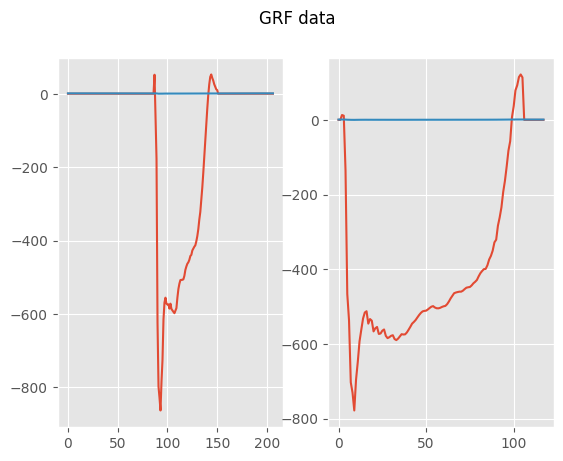

In [31]:
from cProfile import label
from calendar import c
import csv
from sre_constants import RANGE
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import zoom

plt.style.use('ggplot')

grf_filename=r'.\\Visual3d_SIMM_grf.csv'
iaa_filename=r'.\\cl2_InducedAccelerations_induced_constraint_reactions.csv'

def create_list(file_dir, variable):
    with open(file_dir) as csvfile:
        reader = csv.reader(csvfile, delimiter = ",")
        count=0
        iterator=0
        col=-1
        values=[]
        verified_label="none"
        for row in reader:
            if count==0:
                for label in row:
                    if label==variable:
                        col=iterator
                        verified_label=label
                        break
                    else:
                        iterator+=1

            if count>0 and col!=-1:
                values.append(float(row[col]))
            count+=1
        return values

# create grf filenames
grf_x=create_list(grf_filename,"l_ground_force_vx")
grf_x_iaa=create_list(iaa_filename,"total_left_foot_contact_ground_Fx")


time_grf =create_list(grf_filename,"time")
fs_grf = 200
time_iaa =create_list(iaa_filename,"time")

if time_iaa == time_grf:
    print('time is the same between IAA and GRF')
else:
    print('time is different between IAA and GRF')
    plt.plot(time_iaa)
    plt.plot(time_grf)
    plt.legend(['iaa_time', 'grf_time'])


def time_norm(timeseries):

    timeseries = np.array(timeseries)
    time_normalised_series = (timeseries-min(timeseries))/(max(timeseries)-min(timeseries))
    return time_normalised_series

grf_x_time_norm = time_norm(grf_x)
grf_x_iaa_time_norm =time_norm(grf_x_iaa)


plt.suptitle("GRF data")
plt.subplot(1,2,1)
plt.plot(grf_x)
plt.plot(grf_x_time_norm)

plt.subplot(1,2,2)
plt.plot(grf_x_iaa)
plt.plot(grf_x_iaa_time_norm)


In [ ]:

plt.subplot(4,2,4)

plt.plot(interval_grf_x_iaa)

plt.subplot(4,2,5)
factor = 250/len(grf_x_time_norm)
test_list4=zoom(grf_x_time_norm,factor)
plt.plot(test_list4)

plt.subplot(4,2,6)
factor=250/len(interval_grf_x_iaa)
test_list5=zoom(interval_grf_x_iaa,factor)
plt.plot(test_list5)


plt.subplot(4,2,7)
plt.plot(time_grf,grf_x,label="grf")
plt.plot(time_iaa,grf_x_iaa,label="crf")
plt.legend()

plt.subplot(4,2,8)
plt.plot(test_list5,label="grf")
plt.plot(test_list4,label="crf")
plt.legend()
plt.show()



